import libraries and set style for matplotlib

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)

print(plt.style.available)
#plt.style.use('default')
#plt.style.use('seaborn-darkgrid')
#plt.style.use("seaborn")
#plt.style.use("tableau-colorblind10")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Read in data

In [3]:
df_all=pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_all.csv')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2138 non-null   int64  
 1   cat_name                2138 non-null   object 
 2   num_images              2138 non-null   int64  
 3   num_videos              2138 non-null   int64  
 4   age                     2138 non-null   object 
 5   breed                   2138 non-null   object 
 6   color                   1825 non-null   object 
 7   size                    2138 non-null   object 
 8   sex                     2138 non-null   object 
 9   characteristics         844 non-null    object 
 10  house_trained           2125 non-null   object 
 11  health                  2073 non-null   object 
 12  good_in_a_home_with     1337 non-null   object 
 13  adoption_fee            379 non-null    object 
 14  prefers_a_home_without  327 non-null    

In [3]:
df_all.head(50)
df_all.loc[(df_all['data_set']=='seven_days') | (df_all['data_set']== 'fourteen_days')].head(5)
df_all.loc[(df_all['data_set']== 'fourteen_days') | (df_all['data_set']== 'thirty_days')].head(5)



,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,house_trained,health,good_in_a_home_with,adoption_fee,prefers_a_home_without,coat_length,pet_story_num_words,rescue_group,data_set,num_cats
242,0,Sylvie,4,0,Adult,Domestic Short Hair,Tabby (Brown / Chocolate),Medium,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,Children.,Short,263.0,City Critters Inc.,fourteen_days,1
243,1,Carrot,6,0,Kitten,Domestic Short Hair,Orange / Red,Small,Male,NaN,Yes,"Vaccinations up to date, spayed / neutered.","Other cats, children.",NaN,NaN,Short,109.0,City Critters Inc.,fourteen_days,1
244,2,Belle/Ollie,5,1,Kitten,Domestic Short Hair,Gray & White,Small,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,NaN,Short,62.0,City Critters Inc.,fourteen_days,1
245,3,Mickey,4,0,Adult,Bombay & Domestic Short Hair Mix,Black,Medium,Male,"Friendly, Affectionate, Gentle, Playful, Curio...",Yes,Spayed / neutered.,"Other cats, dogs, children.",NaN,NaN,Short,126.0,Ready For Rescue,fourteen_days,1
246,4,Lah Lah,5,1,Senior,Domestic Short Hair,Black,Medium,Male,"Friendly, Playful, Curious, Brave, Smart, Funn...",Yes,"Vaccinations up to date, spayed / neutered.",Other cats.,NaN,NaN,Short,171.0,Ready For Rescue,fourteen_days,1


Create frequency distribution function

In [4]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes; example variable_: 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(1),
        'Cumulative Frequency': datax.values.cumsum(),
        'Cumulative Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(1)   })
    
    #datay.set_index(variable_)
    
    return(datay)

In [5]:
df_freq_data_set = proc_freq(df_all,'data_set')
df_freq_data_set.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_freq_data_set.csv')

df_freq_data_set

,data_set,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,fourteen_days,345,16.1,345,16.1
1,one_day,38,1.8,383,17.9
2,seven_days,204,9.5,587,27.5
3,spec_needs_other,14,0.7,601,28.1
4,thirty_day_spec_needs,104,4.9,705,33.0
5,thirty_days,1433,67.0,2138,100.0


In [6]:
def freq_crosstab(var1,var2):
    datab = pd.crosstab(var1, var2, margins=True, margins_name='Total')
    return(datab)



In [12]:
# DENISE TEST 10-24-22
df_all['thirty_days_']= df_all.data_set.isin(['thirty_days'])
df_all['thirty_days_'].value_counts()

True     1433
False     705
Name: thirty_days_, dtype: int64

In [6]:
df_all['cat_id']=df_all['cat_name'] + ' ' + df_all['rescue_group']

df_all['thirty_days']=df_all['data_set'].apply(lambda x:  x in ['thirty_days'])

df_all['other_days'] =df_all['data_set'].apply(lambda x: x in ['one_day','seven_days','fourteen_days'])      

df_all['spec_needs'] = df_all['data_set'].apply(lambda x: x in ['spec_needs_other','thirty_day_spec_needs'])

#df_all['color'] = df_all['color'].astype(str)

# Tabby = [True if 'Tabby' in cat else False for cat in df_all['color']]
# print('length Tabby ',len(Tabby))
# df_all['Tabby'] = pd.Series(Tabby)


df_all['pet_story_num_words']  = df_all['pet_story_num_words'].fillna(0)

df_all['without_story'] = df_all['pet_story_num_words'] == 0

#df_all['pet_narrative'] = df_all['pet_story_num_words'] != 0
df_all['pet_narrative'] = df_all['without_story'] ==0

df_all['coat_length_miss'] = df_all['coat_length'].fillna('unknown')

df_all['color_miss'] = df_all['color'].fillna('unknown')
df_all['color_bool'] = df_all['color_miss']!= 'unknown'

# good_in_a_home_with
# prefers_a_home_without
# characteristics
df_all['good_in_a_home_with'] = df_all['good_in_a_home_with'].fillna('unknown')
df_all['good_in_a_home_with_bool'] = df_all['good_in_a_home_with']!= 'unknown'

df_all['prefers_a_home_without'] = df_all['prefers_a_home_without'].fillna('unknown')
df_all['prefers_a_home_without_bool'] = df_all['prefers_a_home_without']!= 'unknown'

df_all['characteristics'] = df_all['characteristics'].fillna('unknown')
df_all['characteristics_bool'] = df_all['characteristics'] != 'unknown'

df_all['breed'] = df_all['breed'].fillna('unknown')

df_all['color'] = df_all['color'].fillna('unknown')

#create 'more_than_1_cat'
and1 = [True if 'and' in cat.split() else False for cat in df_all['cat_name']]
and2 = [True if '&' in cat.split() else False for cat in df_all['cat_name']]

mtn=(np.logical_or(and1,and2))
print('len more_than_1_cat ',len(mtn))

df_all['more_than_1_cat'] = pd.Series(mtn)



df_all['video']= df_all['num_videos'] > 0

df_all['num_pictures'] = df_all['num_images'].astype(str)

df_all['pictures'] = df_all['num_images'] > 0



breed_type=[]
for breed in df_all['breed']:
    if 'Domestic Short Hair' in breed:
        breed_type.append('DSH')
    elif 'Long Hair' in breed:   #Note 'Long Hair' must be identified before 'Mix','Tuxedo' 'Tortoiseshell' etc
        breed_type.append('DLH')
    elif 'Mix' in breed:
        breed_type.append('DSH')
    elif 'Tuxedo' in breed:
        breed_type.append('DSH')
    elif 'Tabby' in breed:
        breed_type.append('DSH')
    elif 'Calico' in breed:
        breed_type.append('DSH')
    elif 'Tortoiseshell' in breed:
        breed_type.append('DSH')
    elif 'Tiger' in breed:
         breed_type.append('DSH')
        
    else:
        breed_type.append('Other')

print('list length = ',len(breed_type))
        
df_all['breed_type'] = pd.Series(breed_type)

#create boolean to identify duplicates on the file
filt = df_all.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
list_dupe_cat_ids = df_all.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[filt.values,:].index

df_all['is_dupe'] = df_all['cat_id'].isin(list_dupe_cat_ids)

#need variable in this form for graphs in analysis
days_on_site = ['Thirty Days Plus' if v == True else 'Less Than Thirty Days' for v in df_all['thirty_days']]
print('days on site length',len(days_on_site)) 

df_all['Days_On_Site'] = pd.Series(days_on_site)

print(proc_freq(df_all,'Days_On_Site'))

# colors_keep=['Black & White / Tuxedo','Black', 'Tabby (Brown / Chocolate)', 'Gray & White', \
#         'Tabby (Gray / Blue / Silver)', 'Orange & White', 'Gray / Blue / Silver', 'Calico', \
#         'Tabby (Tiger Striped)', 'Tabby (Buff / Tan / Fawn)', 'White','Tortoiseshell', 'Orange / Red', \
#         'Tabby (Orange / Red)'   ]

# lst =[]    
# for color_ in df_all['color']:
#     if color_ in colors_keep:
#         lst.append(color_)
#     else:
#         lst.append('Other')

#df_all['color_new'] = pd.Series(lst)
#print('len of lst ',len(lst))

df_all.shape



len more_than_1_cat  2138
list length =  2138
days on site length 2138
            Days_On_Site  Frequency  Percent  Cumulative Frequency  \
0  Less Than Thirty Days        705     33.0                   705   
1       Thirty Days Plus       1433     67.0                  2138   

   Cumulative Percent  
0                33.0  
1               100.0  


(2138, 39)

In [8]:
list_dupe_cat_ids 

Index(['Fries & Mash - Bonded Brothers AdvoCat Rescue',
       'Mash & Fries - Bonded Brothers AdvoCat Rescue',
       'Miss Misstoffelees AdvoCat Rescue',
       'Hermione - Hogwarts Kittens AdvoCat Rescue',
       'Harry - Hogwarts Kittens AdvoCat Rescue', 'The Jimmy AdvoCat Rescue',
       'Ron - Hogwarts Kittens AdvoCat Rescue',
       'Romeo and Guero The Lucky Cat Rescue',
       'Skittles Yellow Brick Road Rescue NJ',
       'Rocky All About Cats Rescue, Inc',
       ...
       'Moonbeam Happy Homes Animal Rescue', 'Marnie S.A.R.A. Inc.',
       'Baby Nives NYC Teens for Animals',
       'Ziggy Hudson County Animal League (HCAL)', 'Mr. Man Eccentric Kittens',
       'Magic Brooklyn Bridge Animal Welfare Coalition', 'Avery Infinite Hope',
       'Vital Animal Life Savers Inc.',
       'VERY URGENT! Checkers needs a foster! daps animals',
       'zzCourtesy Listing Percy - PLEASE CALL (914) 841-1001. Humane Society of Westchester at New Rochelle'],
      dtype='object', name='cat_

write out data

In [7]:
#write out df_all minus special needs

df_all2 = df_all.loc[df_all['spec_needs']==False,:]
df_all2 = df_all2.drop(['spec_needs','size','Unnamed: 0','house_trained','health','num_cats','other_days'], axis = 1)

# df_all2.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_all.csv')

print('df_all2.shape = ',df_all2.shape)

# 'characteristics',
#df_all2.info()

df_all2.shape =  (2020, 32)


In [8]:

#Remove duplicates based on cat_id and export to csv

df_deduped = df_all2.drop_duplicates(subset=['cat_id'], keep='first')
# df_deduped.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_deduped.csv')
df_deduped.shape

(1780, 32)

In [10]:
with pd.ExcelWriter('test.xlsx') as writer:
    df_freq_data_set.to_excel(writer, sheet_name= 'Frequency Distribution',index=False)
    df_deduped.to_excel(writer, sheet_name = 'deduped',index=False)

Investigate duplicates

In [16]:

mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
#Once it's aggregated it becomes a one column DataFrame -  cat_id is index and cat_name is a boolean

print('type: mask  ',type(mask))
print('shape: mask  ',mask.shape)
# print(mask)
print(' ')

#this get's the values of the index which is cat_id and creates an index object which is essentially a list of the cat_id's
#Without the .index it just creates a DataFrame
list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
print('type list_mask:  ',type(list_mask))
# print('list_mask:  ')
# print(list_mask)
# print(' ')

#final_mask is a boolean Series with the same index as df_all2
final_mask = df_all2['cat_id'].isin(list_mask) 
print('type: final_mask  ',type(final_mask))
print('final_mask.shape:  ',final_mask.shape) 
# print('final_mask:  ')
# print(final_mask)


#the df created  below is the rescue group followed by however many duplicates #It is a dataframe
df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group']).count()



type: mask   <class 'pandas.core.frame.DataFrame'>
shape: mask   (1780, 1)
 
type list_mask:   <class 'pandas.core.indexes.base.Index'>
type: final_mask   <class 'pandas.core.series.Series'>
final_mask.shape:   (2020,)


cat_id
thirty_days rescue_group                                         
False       A Purrfect World                                    2
            Adopt-A-Buddy                                       2
            AdvoCat Rescue                                     48
            All About Cats Rescue, Inc                         23
            Alleykattz Rescue                                   4
            Animal Adoption Veterinary Center                   4
            Animal Life Savers Inc.                            20
            Animal Lighthouse Rescue                            2
            Animals Are Forever, Inc                            2
            Anjellicle Cats Rescue                              2
            Bergen County Animal Shelter                        3
            Best Friend Dog and Animal Adoption, Inc.           2
            Bronx Tails Cat Rescue                              6
            Brooklyn Adoptables                                 8
            Brooklyn Animal Action                             27
            Brooklyn Bridge Animal Welfare Coalition            8
            CLAWS                                               6
            Caring About The Strays (C.A.T.S.) Inc.             2
            Cat Assistance Inc.                                 2
            Cat Castle NYC                                      4
            City Critters Inc.                                  4
            East Coast Maine Coon Rescue                        4
            Eastchester Bay Stray Cat Project                   2
            Eccentric Kittens                                  16
            Edison Municipal Animal Shelter                    10
            For Blake's Sake Rescue, Inc.                       8
            Frankie's Fund for Feline Care and Rescue           2
            Friends of Linden Animal Shelter, Inc.             20
            Friends of the Clifton Animal Shelter               6
            Good World Animal Rescue and Protection,…           2
            Happy Friends Rescue                                2
            Happy Homes Animal Rescue                           8
            Hudson County Animal League (HCAL)                  2
            Humane Society of Westchester at New Rochelle       7
            Humane Urban Group                                  4
            Infinite Hope                                      10
            Jersey Tails                                        2
            JerseyCats                                          2
            Kat Connection                                      8
            KittyKaretakers of Queens                           2
            KittyKind                                           2
            Lend-a-Paw Inc.                                     4
            Liberty Humane Society                             16
            Meows Kitty Cat Rescue Inc.                        14
            Miss Pats Cats                                      2
            PAWS - Montclair                                    2
            Pequannock Animal Shelter                           2
            Pets4Luv Foundation                                 2
            Posh Pets Rescue                                    2
            Ready For Rescue                                    4
            Rescue Haven Foundation                             2
            S.A.R.A. Inc.                                       8
            Saving Cats & Kittens of Brooklyn                   2
            Sunset Park Cats                                    4
            The Lucky Cat Rescue                                3
            Union City Animal Trust                             3
            Union City Feral Cat Committee                     12
            Waggytail Rescue                                    2
            West Orange TNVR                                    2
            Whiskers-aGoGo Inc   

'     '

Calculate percent of rescue groups with duplicate listings

In [79]:
#CALCULATING PERCENT OF RESCUE GROUPS THAT RELIST CATS

all_rescue_groups = df_all2['rescue_group'].unique()
num_rescue_groups = len(all_rescue_groups)
print(len(all_rescue_groups))
print(type(all_rescue_groups))


num_rescues_w_dupes = len(df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group']))
print('num_rescues_w_dupes ',num_rescues_w_dupes)
print('type num_rescues_w_dupes  ',type(num_rescues_w_dupes))

print(type(num_rescues_w_dupes))

print(type(df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group'])))
percent_relist = num_rescues_w_dupes/num_rescue_groups
print('percent_relist = ',percent_relist)

 

177
<class 'numpy.ndarray'>
num_rescues_w_dupes  70
type num_rescues_w_dupes   <class 'int'>
70
<class 'int'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
percent_relist =  0.3954802259887006


# Percent of Rescue Groups that relist cats = 40%

What percentage of unique ids are duplicates? 

In [106]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

df_all2.groupby(['cat_id'])['pet_story_num_words'].nunique()


list_cat_ids_with_dupes = df_all2.loc[final_mask ,'cat_id'].unique()
print('len((list_cat_ids_with_dupes))  ',len((list_cat_ids_with_dupes)))
print(' ')


list_all_cat_ids = df_all2.loc[:,'cat_id'].unique()

#What percentage of unique ids are duplicates
pct_of_totalcats=len((list_cat_ids_with_dupes))/len(list_all_cat_ids)
print('pct_of_totalcats  ',pct_of_totalcats)

# print ('len(final_mask)  ',len(final_mask))
# df_all2['final_mask'] = final_mask

len((list_cat_ids_with_dupes))   189
 
pct_of_totalcats   0.10617977528089888


# percent of total cats relisted = 11%

Further investigate duplicates

In [241]:
# df_check = df_all2.loc[df_all2['is_dupe']==1,:].groupby(['cat_id'])['pet_story_num_words','breed','good_in_a_home_with', 'prefers_a_home_without', 'characteristics', 'color'].nunique()
# type(df_all2.groupby(['cat_id'])['pet_story_num_words',].nunique())
# df_check.head()
# df_check

# L =['pet_story_num_words','breed','good_in_a_home_with', 'prefers_a_home_without', 'characteristics', 'color']
# #group.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['birthrate']

# for el in L:
#     print(el,df_check[el].mean)
    
#There is no difference in the other variables for the duplicates

# There is no difference in the other columns for the duplicate cat_id's

In [129]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)
#df_all['Days_On_Site']
#df_all2['is_dupe'] = df_all2['cat_id'].isin(list_cat_ids_with_dupes)

group_not30 = df_all2.groupby(['thirty_days','is_dupe']).agg({'cat_id':'nunique'})

group_thirty = df_all2.groupby(['thirty_days']).count()['cat_name']

print(type())
print('group_not30  ')
print(group_not30)
print(' ')

print('type(group_thirty)  ',type(group_thirty))
print('group_thirty  ')
print(group_thirty)

group_not30  
                     cat_id
thirty_days is_dupe        
False       False       170
            True        185
True        False      1421
            True          8
 
type(group_thirty)   <class 'pandas.core.series.Series'>
group_thirty  
thirty_days
False     587
True     1433
Name: cat_name, dtype: int64


Frequency of duplicates

In [17]:
df_cat_id_dupe_freq = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).reset_index()
df_cat_id_dupe_freq = df_cat_id_dupe_freq.loc[df_cat_id_dupe_freq['cat_name'] > 1,:]

proc_freq(df_cat_id_dupe_freq,'cat_name')                                                                                                                                                                                                                                                                                                                                         

,cat_name,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,2,165,87.3,165,87.3
1,3,17,9.0,182,96.3
2,6,4,2.1,186,98.4
3,8,3,1.6,189,100.0


In [22]:
# Why not work?
# Denise test

# df_all2.groupby(['cat_id'])['cat_name':'count']

# ? below cell

In [20]:
# DENISE TEST 10-24-22 
df_all2.groupby(['cat_id']).count().head()

,cat_name,num_images,num_videos,age,breed,color,sex,characteristics,good_in_a_home_with,adoption_fee,...,prefers_a_home_without_bool,characteristics_bool,more_than_1_cat,video,num_pictures,pictures,breed_type,is_dupe,Days_On_Site,thirty_days_
cat_id,,,,,,,,,,,,,,,,,,,,,
3 legged Clyde S.A.R.A. Inc.,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
ADRIAN & Arie Place For Cats,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
ANITA - A Beauty! Edison Municipal Animal Shelter,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ARIE & Adrian Place For Cats,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
ASPARAGUS - Friendly Girl Edison Municipal Animal Shelter,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


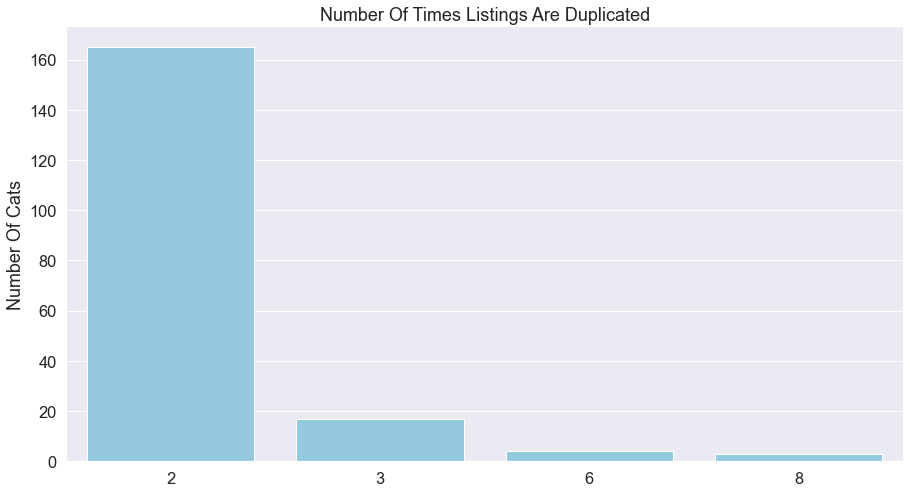

<Figure size 1080x576 with 0 Axes>

In [35]:
# Bigger than normal fonts
sns.set(font_scale=1.5)

sns.set_style('darkgrid')
chart = sns.countplot(x='cat_name', data = df_cat_id_dupe_freq, color='skyblue')

chart.set(xlabel="Number of Relist", ylabel = "Count")

chart.set(xlabel="", ylabel = "Number Of Cats")

chart.set(title='Number Of Times Listings Are Duplicated')

plt.figure(figsize = (15,8))
sns.set(rc = {'figure.figsize':(15,8)})

plt.savefig('Number of Duplicates Frequency.png', dpi=300)


In [ ]:
df_all2.groupby(['rescue_group']).count()[['cat_id']].sort_values(by=['cat_id'],ascending=False) 

In [ ]:
df_all2.loc[df_all2['age']== 'Adult'].groupby(['rescue_group']).unique()[['cat_id']].sort_values(by=['cat_id'],ascending=False) 

In [ ]:
df_all['spec_needs'] 

good_in_a_home_with     1337 non-null 

Top 10 Rescue groups in terms of number of adult cats

Top 10 Rescue groups in terms of number of senior cats

Top 10 Rescue groups in terms of number of special needs cats

are duplicate records the same in every way except for days on site
are duplicate records the same in every way except for a specific field
 

dupes across all three

count distinct

num cats age cross tab

num cats color cross tab
 
box plot num words not miss

% no dupe       
drop_duplicates()
duplicated() can make a mask and select a subset of columns to see if there are duplicates and count the number of trues

In [164]:
#df_all.info()

In [214]:
#print(proc_freq(df_all2,'more_than_1_cat'))
freq_crosstab(df_all2['more_than_1_cat'],df_all2['age'])
#proc_freq(df_all2,'data_set')

age,Adult,Kitten,Senior,Young,Total
more_than_1_cat,,,,,
False,648,616,118,426,1808
True,37,120,5,50,212
Total,685,736,123,476,2020




determining if it is worth is to break things out further by age and it's not

In [88]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

dupes_by_days_age = df_all2.loc[final_mask,['cat_id','Days_On_Site','age']].groupby(['Days_On_Site','age']).count().reset_index()
dupes_by_days_age

print(' ')
#type(dupes_by_age)
print(dupes_by_days_age)

 
            Days_On_Site     age  cat_id
0  Less Than Thirty Days   Adult      62
1  Less Than Thirty Days  Kitten     272
2  Less Than Thirty Days  Senior      18
3  Less Than Thirty Days   Young      65
4       Thirty Days Plus   Adult       8
5       Thirty Days Plus  Kitten       2
6       Thirty Days Plus   Young       2


In [36]:
dupes_by_days = df_all2.loc[final_mask,['cat_id','Days_On_Site']].groupby(['Days_On_Site']).nunique().reset_index()

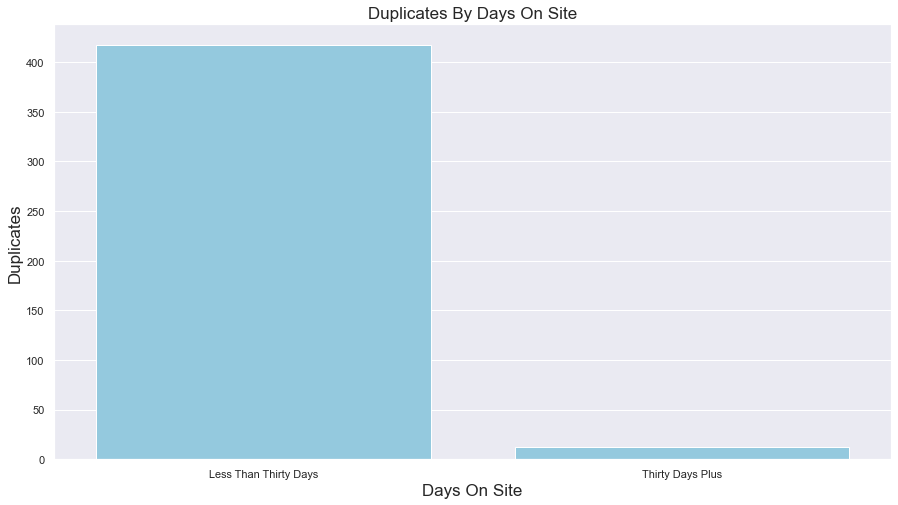

<Figure size 1080x576 with 0 Axes>

In [37]:
#set font size 
sns.set(font_scale=1.5)
plt.figure(figsize = (15,8))
sns.set(rc = {'figure.figsize':(15,8)})



sns.set_style('darkgrid')
color_order=['Less Than Thirty Days','Thirty Days Plus']
 
chart = sns.barplot(x='Days_On_Site', y='cat_id', data = dupes_by_days, ci=False, order=color_order, color='skyblue')

#chart.set(xlabel="Days On Site", ylabel = "Number Of Duplicates")

plt.xlabel("Days On Site", fontsize = 17)
plt.ylabel("Duplicates", fontsize = 17)


chart.set_title('Duplicates By Days On Site', fontsize = 17)
plt.figure(figsize = (15,8))



plt.savefig('Cats Relisted By Days On Site', dpi=300)




In [29]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

df_7_14 = df_all2.loc[final_mask,['cat_id','data_set']].groupby(['data_set']).nunique().reset_index()
df_7_14.value_counts()

data_set       cat_id
fourteen_days  185       1
one_day        11        1
seven_days     183       1
thirty_days    8         1
dtype: int64

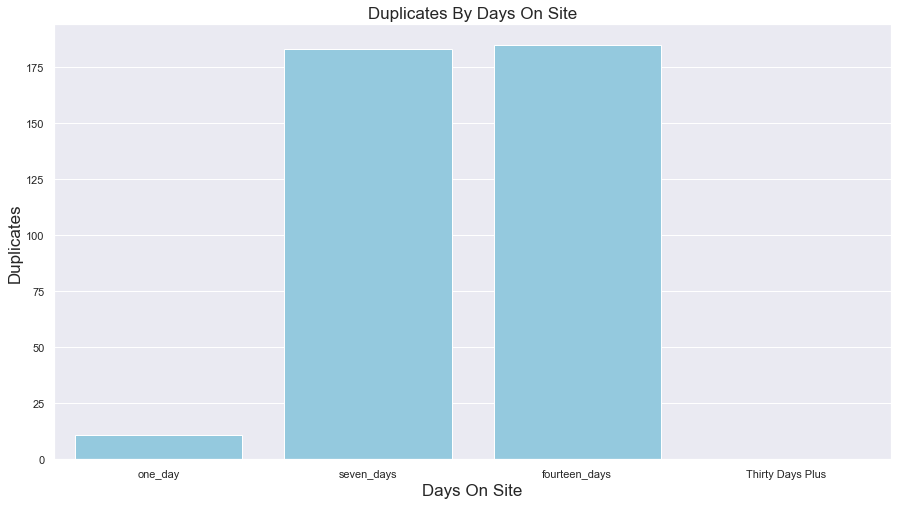

<Figure size 1080x576 with 0 Axes>

In [30]:
sns.set_style('darkgrid')
color_order=['one_day','seven_days','fourteen_days','Thirty Days Plus']
 
chart = sns.barplot(x='data_set', y='cat_id', data = df_7_14, ci=False, order=color_order, color='skyblue')

#chart.set(xlabel="Days On Site", ylabel = "Number Of Duplicates")

plt.xlabel("Days On Site", fontsize = 17)
plt.ylabel("Duplicates", fontsize = 17)


chart.set_title('Duplicates By Days On Site', fontsize = 17)
plt.figure(figsize = (15,8))



plt.savefig('Duplicates By Days On Site_7_14.png', dpi=300)

In [38]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

dupes_by_age = df_all2.loc[(final_mask ),['cat_id','age']].groupby(['age']).nunique().reset_index()
dupes_by_age

,age,cat_id
0,Adult,34
1,Kitten,119
2,Senior,8
3,Young,31


How do I determine if other fields are different for cats that have duplicates (other than days on site)?

<Figure size 1080x576 with 0 Axes>

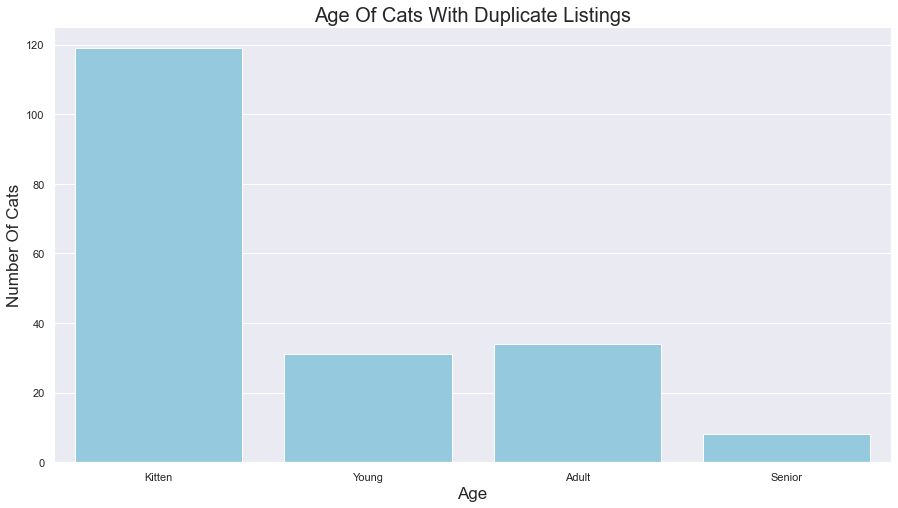

<Figure size 1080x576 with 0 Axes>

In [40]:
#set font size 
sns.set(font_scale=1.5)
plt.rcParams.update({'font.size': 22})


#set size
plt.figure(figsize = (15,8))
sns.set(rc = {'figure.figsize':(15,8)})
plt.savefig('Duplicates By Age.png', dpi=300)

sns.set_style('darkgrid')
color_order=['Kitten','Young','Adult','Senior']
 
chart = sns.barplot(x='age', y='cat_id', data = dupes_by_age, ci=False, order=color_order, color='skyblue')

chart.set(xlabel="Age", ylabel = "Duplicates By Age")

plt.xlabel("Age", fontsize = 17)
plt.ylabel("Number Of Cats", fontsize = 17)


chart.set_title('Age Of Cats With Duplicate Listings', fontsize = 20)
plt.figure(figsize = (15,8))

How many cats in both?    

183 cats were in both the 'seven_days' and 'fourteen_days' data sets.

In [257]:
#df_all2.drop_duplicates(subset=['cat_id'], keep='first')
df_7days= df_all2.loc[df_all2['data_set']=='seven_days',['cat_id','age']].drop_duplicates(subset=['cat_id'], keep='first')
df_14days = df_all2.loc[df_all2['data_set']=='fourteen_days',['cat_id','age']].drop_duplicates(subset=['cat_id'], keep='first')

df_x = pd.merge(df_7days, df_14days, how='inner', on ='cat_id')
df_x.shape

#183 cats in both the 'seven_days' and 'fourteen_days' website.


(183, 3)

eyeballing rescue groups with duplicates

From looking at some records I could see that the bulk of the duplicates were in both seven_days and fourteen_days data sets.

In [253]:
#df_all2.info()
#df_all2.loc[df_all2['rescue_group']=='AdvoCat Rescue',['cat_name','data_set','age']]
df_all2['data_set'].value_counts()

thirty_days      1433
fourteen_days     345
seven_days        204
one_day            38
Name: data_set, dtype: int64


Alternate method of calculation for more_than_1_cat variable

In [19]:
Alternate method of calculation for more_than_1_cat variable
m_than_one = df_all.loc[df_all['cat_name'].str.contains('&| and ',case=False)]
m_than_one
df_all['more_than_1_cat'] = df_all['cat_name'].apply(lambda x:  x in m_than_one['cat_name'].to_list())
df_all['more_than_1_cat'].value_counts()



False    1921
True      217
Name: more_than_1_cat, dtype: int64

In [215]:
df_all.groupby(['rescue_group'])['cat_id'].nunique()

rescue_group
A Pathway to Hope                                 10
A Purrfect World                                   1
Adopt-A-Buddy                                      3
Adore-a-Bullie Paws and Claws                      3
AdvoCat Rescue                                     7
Alan Purcell Wayne Township Animal Shelter         7
All About Cats Rescue, Inc                        33
All for the Paws                                  10
Alleykattz Rescue                                 39
Amazing Animals Rescue and Adoptions               3
Anarchy Animal Rescue                              3
Angel Pets Animal Welfare Society Inc.            47
Angels for Animals Network                        10
Angels of Animals Inc.                            11
Animal Adoption Veterinary Center                  4
Animal Life Savers Inc.                           10
Animal Lighthouse Rescue                           2
Animal Rescue Force                               19
Animals Are Forever, Inc         